,1,2,3,4,5,6,7,8,9,10
1,0.00,6.80,1.58,6.10,1.80,6.40,4.03,6.50,7.02,3.20
2,6.80,0.00,8.14,7.62,5.10,2.50,5.00,5.66,8.60,9.00
3,1.58,8.14,0.00,7.43,3.04,7.38,5.59,6.80,6.58,1.80
4,6.10,7.62,7.43,0.00,6.32,9.12,3.00,11.05,12.65,9.22
5,1.80,5.10,3.04,6.32,0.00,4.61,3.61,5.10,6.32,4.12
6,6.40,2.50,7.38,9.12,4.61,0.00,6.18,3.20,6.26,7.76
7,4.03,5.00,5.59,3.00,3.61,6.18,0.00,8.06,9.85,7.21
8,6.50,5.66,6.80,11.05,5.10,3.20,8.06,0.00,3.16,6.40
9,7.02,8.60,6.58,12.65,6.32,6.26,9.85,3.16,0.00,5.39
10,3.20,9.00,1.80,9.22,4.12,7.76,7.21,6.40,5.39,0.00


,1,2,3,4,5,6,7,8,9,10
1,0.0,8.5,2.0,8.5,2.5,9.0,5.5,8.5,7.5,4.5
2,8.5,0.0,9.5,10.0,6.0,3.5,7.0,8.0,12.0,9.0
3,2.0,9.5,0.0,10.5,3.5,10.0,7.5,9.5,7.5,2.5
4,8.5,10.0,10.5,0.0,8.0,10.5,3.0,12.0,16.0,13.0
5,2.5,6.0,3.5,8.0,0.0,6.5,5.0,6.0,8.0,5.0
6,9.0,3.5,10.0,10.5,6.5,0.0,7.5,4.5,8.5,9.5
7,5.5,7.0,7.5,3.0,5.0,7.5,0.0,9.0,13.0,10.0
8,8.5,8.0,9.5,12.0,6.0,4.5,9.0,0.0,4.0,9.0
9,7.5,12.0,7.5,16.0,8.0,8.5,13.0,4.0,0.0,7.0
10,4.5,9.0,2.5,13.0,5.0,9.5,10.0,9.0,7.0,0.0


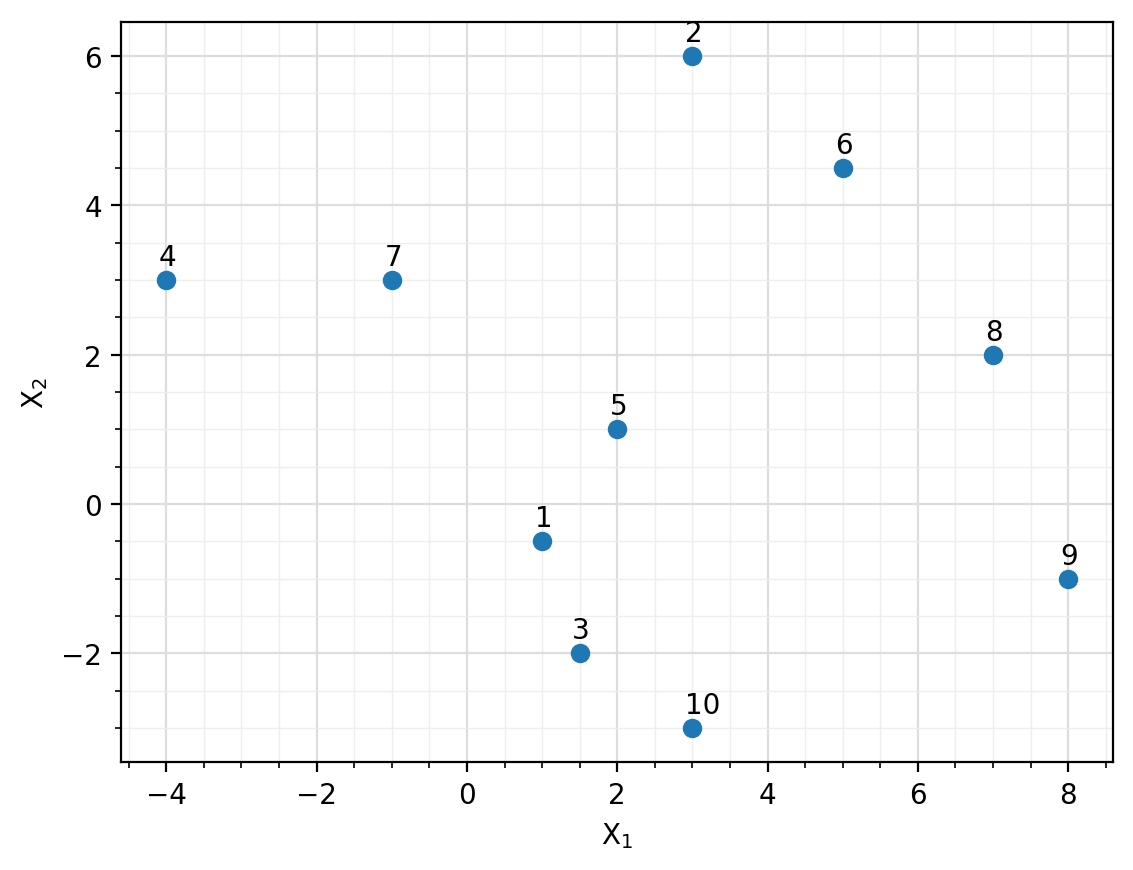

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.spatial import distance

%config InlineBackend.figure_format = 'retina'


def nice_grid(plot_or_ax):
    if isinstance(plot_or_ax, matplotlib.axes._axes.Axes):
        plot_or_ax.xaxis.grid(True, which="major", color="#DDD")
        plot_or_ax.xaxis.grid(True, which="minor", color="#EEE", linewidth=0.5)
        plot_or_ax.yaxis.grid(True, which="major", color="#DDD")
        plot_or_ax.yaxis.grid(True, which="minor", color="#EEE", linewidth=0.5)
        plot_or_ax.minorticks_on()
    else:
        plot_or_ax.rc("axes", axisbelow=True)
        plot_or_ax.grid(True, which="major", color="#DDD")
        plot_or_ax.grid(True, which="minor", color="#EEE", linewidth=0.5)
        plot_or_ax.minorticks_on()


df = pd.DataFrame(
    {
        "x1": [1, 3, 1.5, -4, 2, 5, -1, 7, 8, 3],
        "x2": [-0.5, 6, -2, 3, 1, 4.5, 3, 2, -1, -3],
    },
    range(1, 11),
)

nice_grid(plt)
plt.scatter(df["x1"], df["x2"])
plt.xlabel("$\mathrm{X_1}$")
plt.ylabel("$\mathrm{X_2}$")
for idx, x1 in enumerate(df["x1"]):
    plt.annotate(idx + 1, (x1 - 0.1, df["x2"][idx + 1] + 0.2))

euclidean = distance.squareform(distance.pdist(df, metric="euclidean"))
e_df = (
    pd.DataFrame(euclidean, range(1, 11), columns=range(1, 11))
    .style.set_caption("Euclidean Distances")
    .format(precision=2)
)

manhattan = distance.squareform(distance.pdist(df, metric="cityblock"))

m_df = (
    pd.DataFrame(manhattan, range(1, 11), columns=range(1, 11))
    .style.set_caption("Manhattan Distances")
    .format(precision=1)
)


display(e_df)
display(m_df)

Text(0.5, 1.0, 'Complete Linkage')

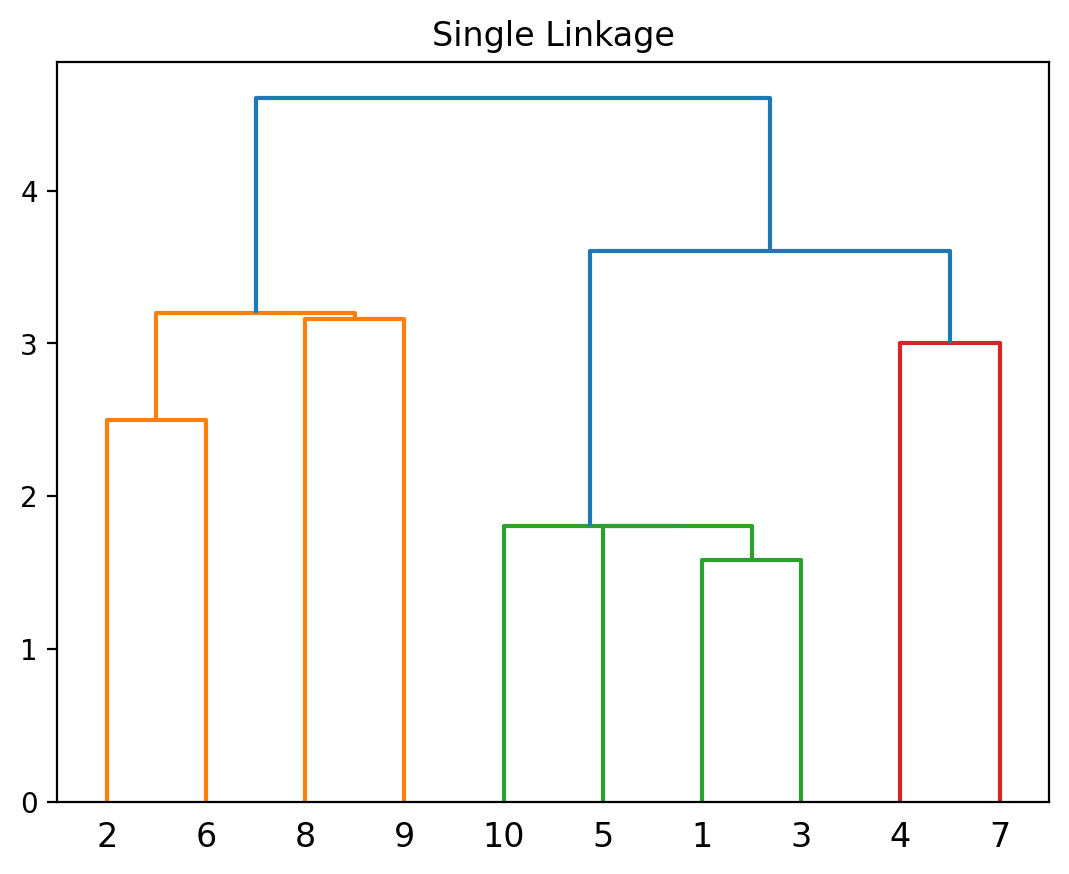

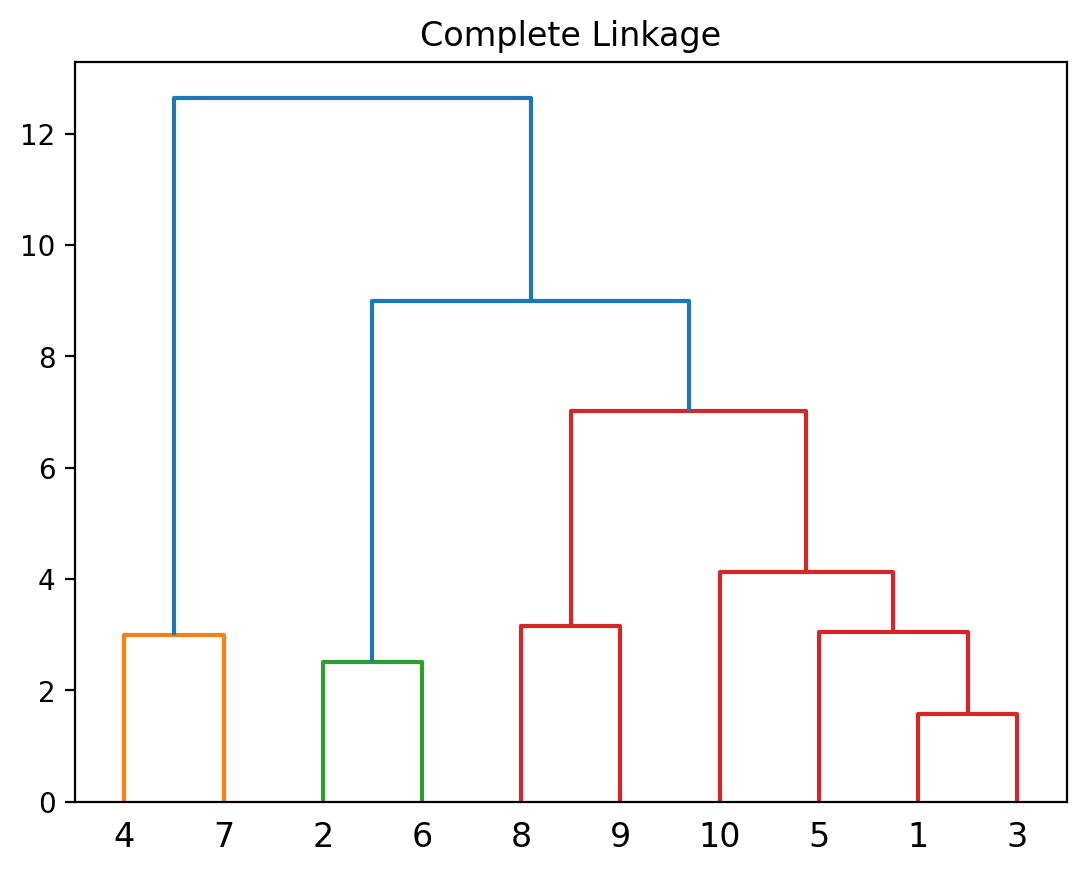

In [67]:
from scipy import cluster

single = cluster.hierarchy.linkage(df, method="single", metric="euclidean")
complete = cluster.hierarchy.linkage(df, method="complete", metric="euclidean")

plt.figure()
cluster.hierarchy.dendrogram(single, labels=range(1, 11))
plt.title("Single Linkage")

plt.figure()
cluster.hierarchy.dendrogram(complete, labels=range(1, 11))
plt.title("Complete Linkage")

Text(0.5, 1.0, 'Using Average Linkage Function')

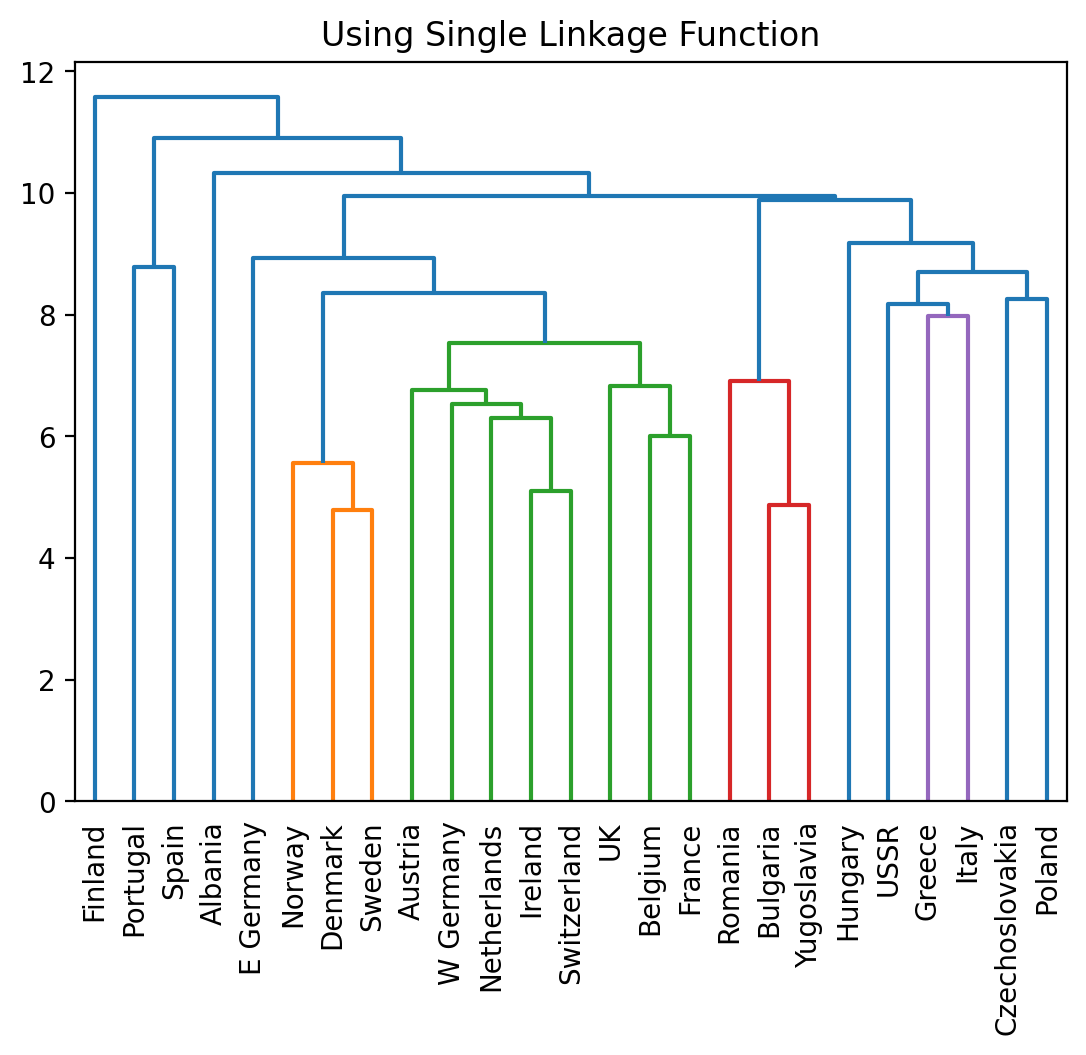

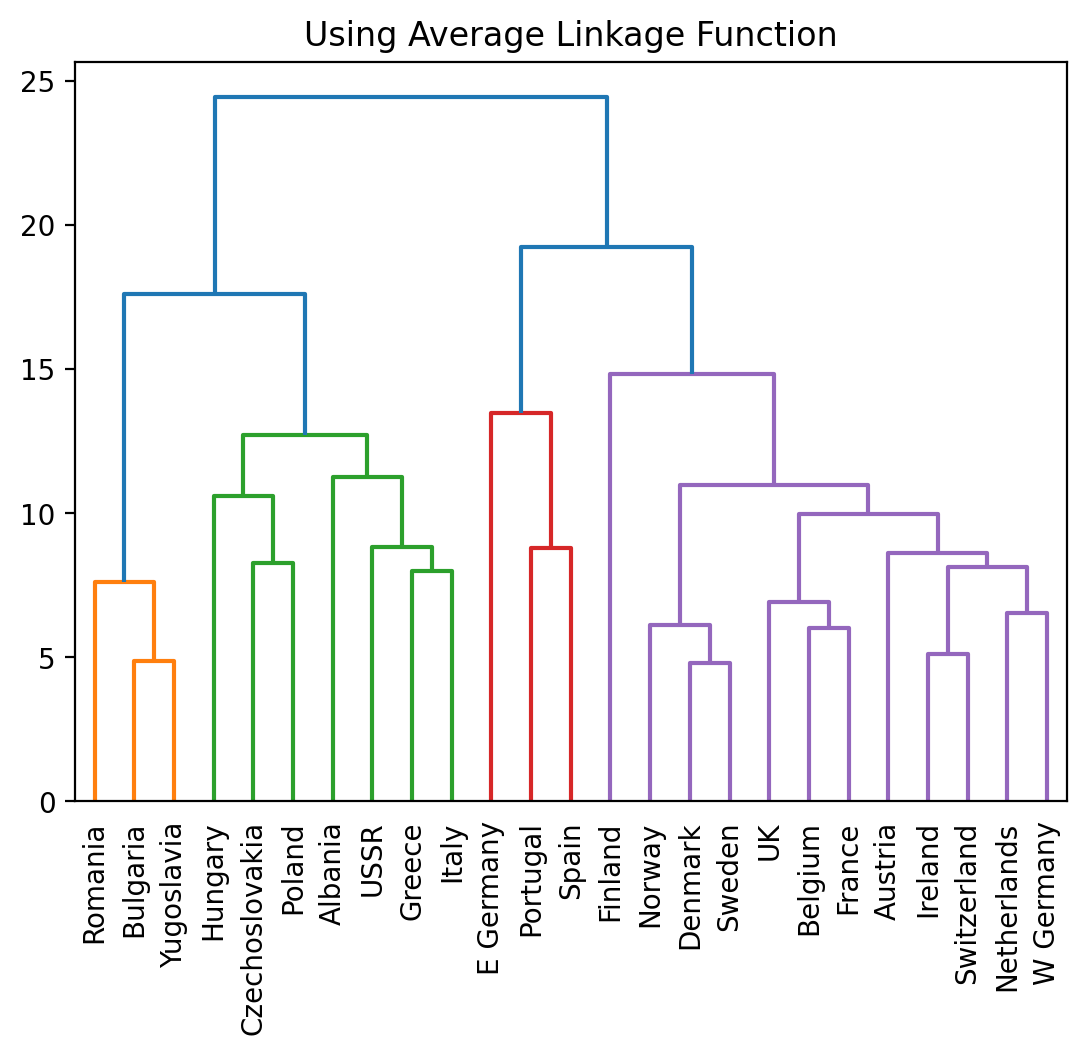

In [78]:
protein_df = pd.read_csv("./hw5protein.txt", delimiter="\t", index_col="Country")

protein_single = cluster.hierarchy.linkage(
    protein_df, method="single", metric="euclidean"
)
plt.figure()
cluster.hierarchy.dendrogram(protein_single, labels=protein_df.index, leaf_rotation=90)
plt.title("Using Single Linkage Function")


protein_single = cluster.hierarchy.linkage(
    protein_df, method="average", metric="euclidean"
)
plt.figure()
cluster.hierarchy.dendrogram(protein_single, labels=protein_df.index, leaf_rotation=90)
plt.title("Using Average Linkage Function")

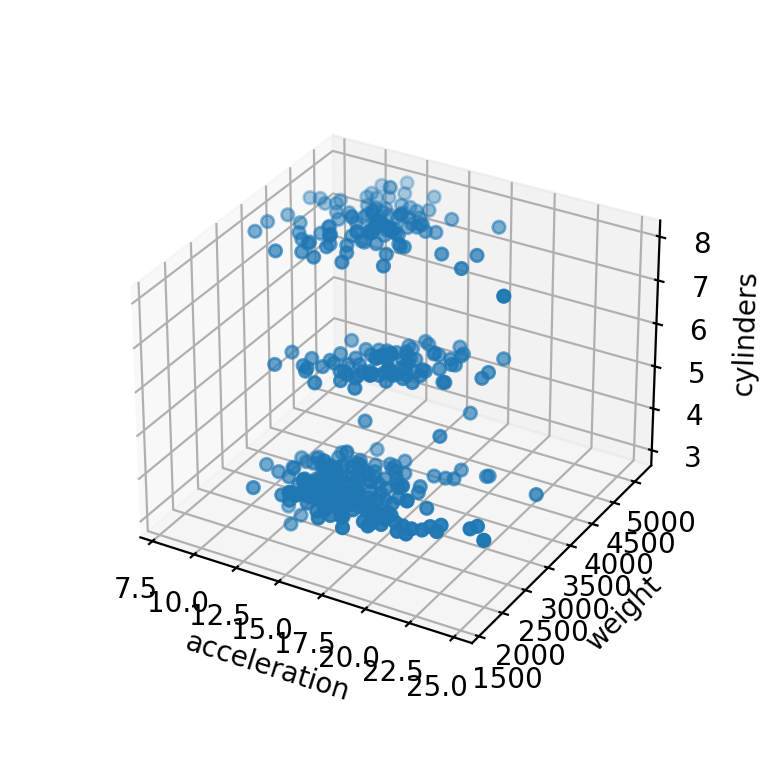

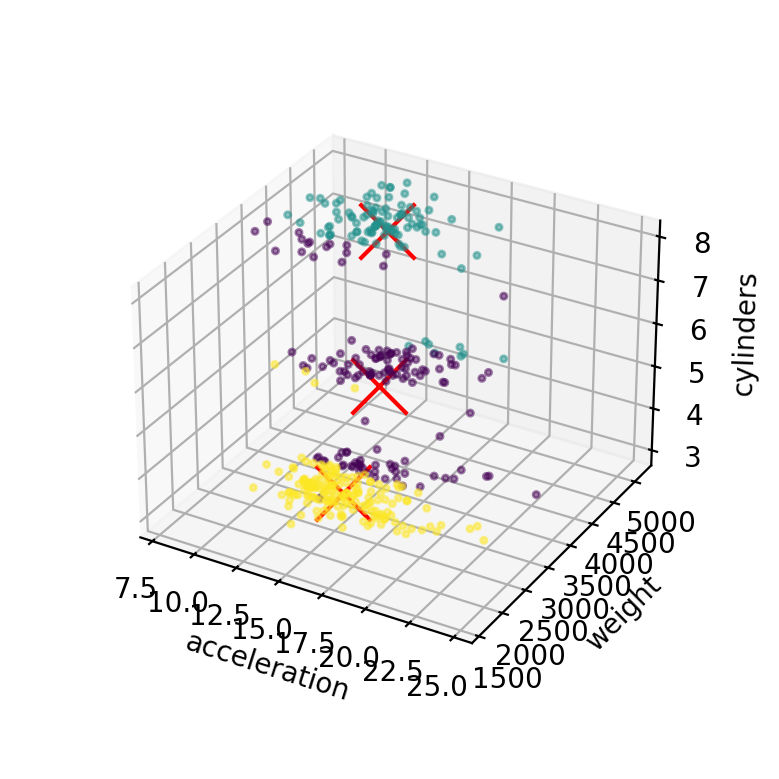

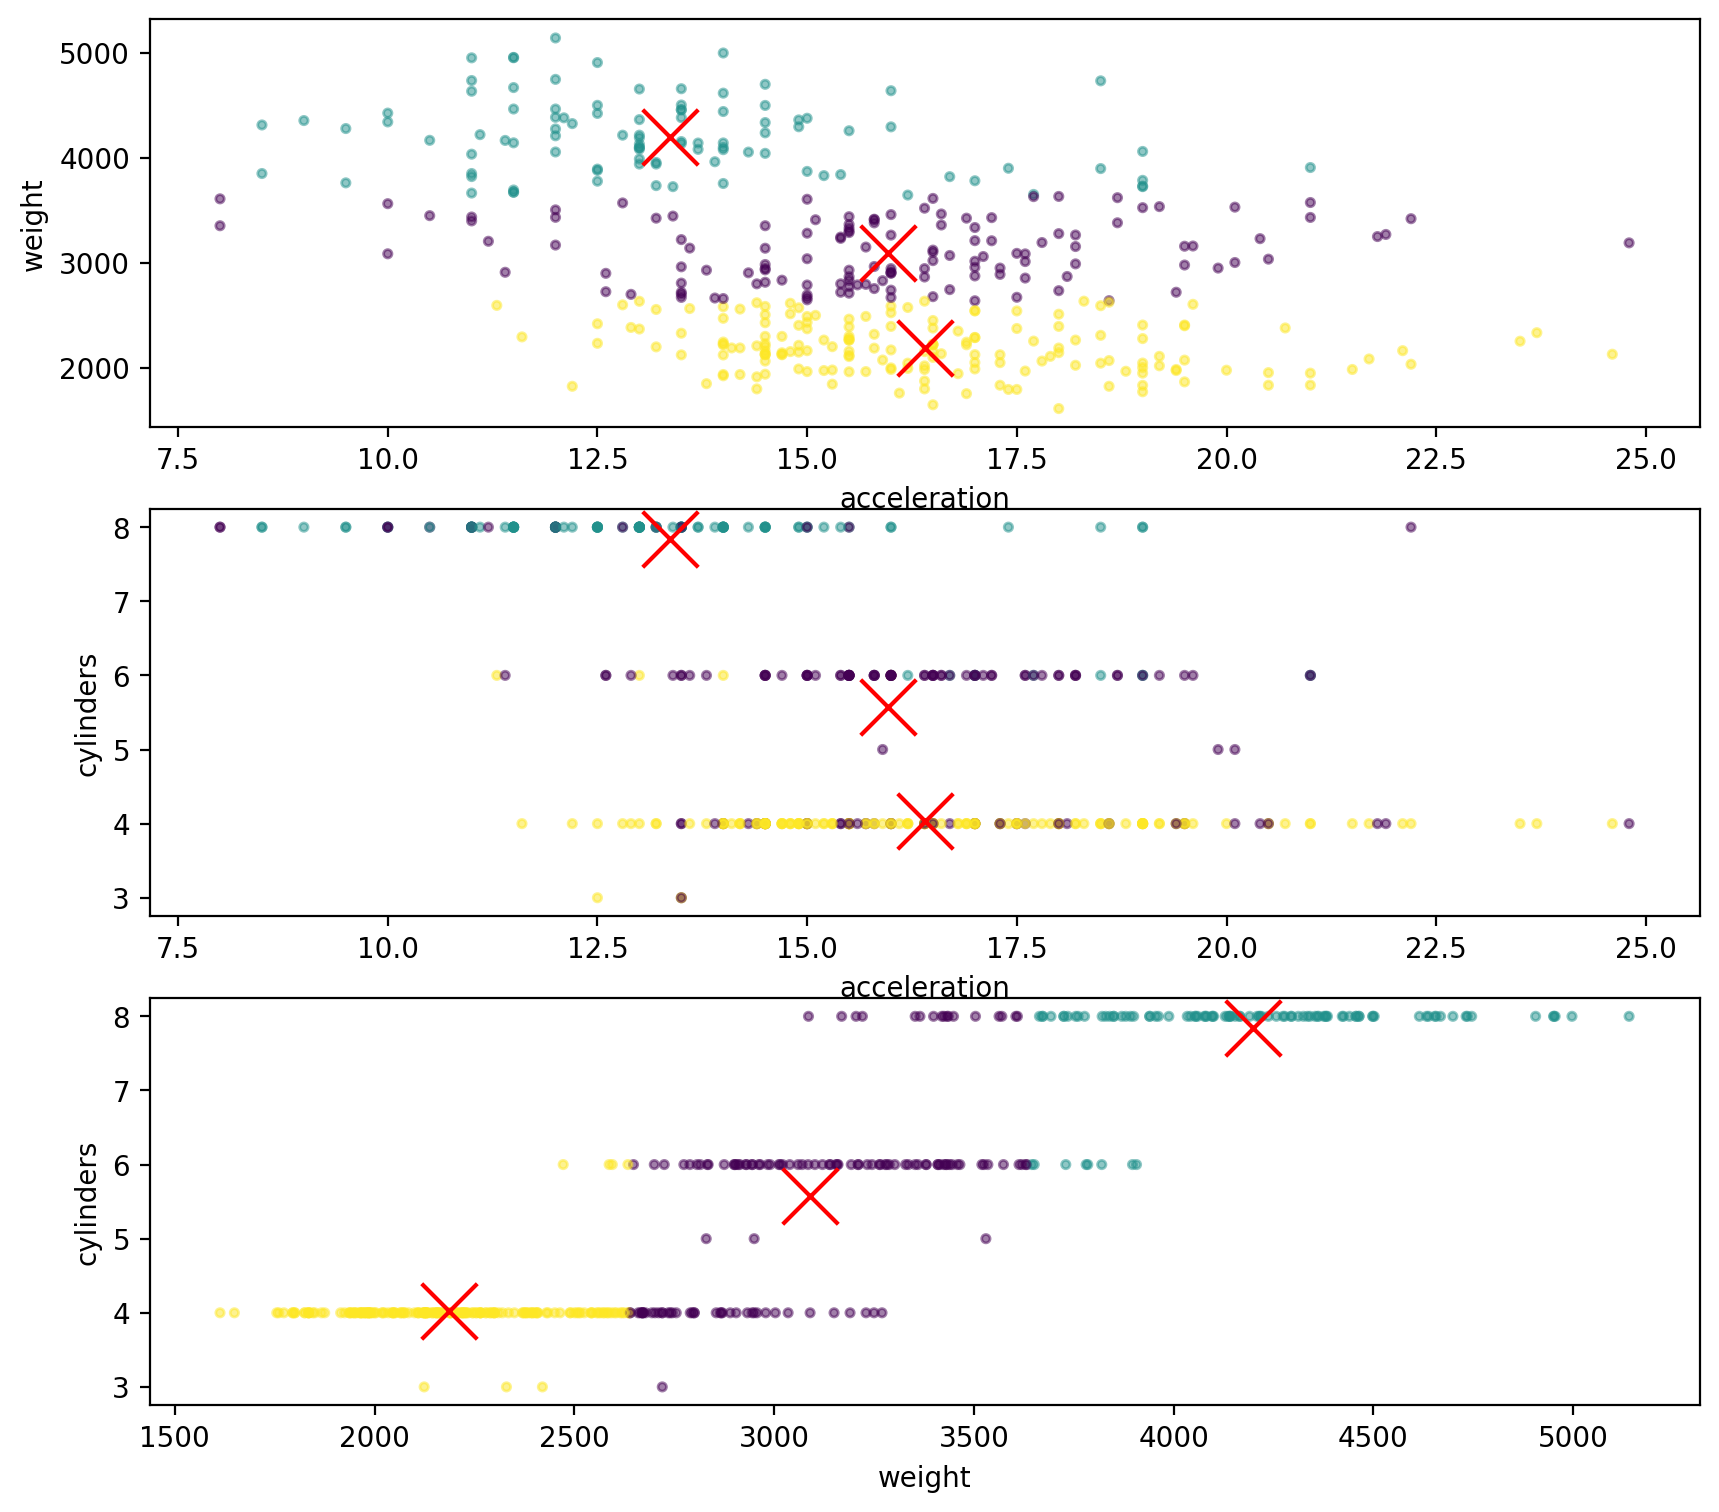

In [175]:
from sklearn import cluster

car_df = pd.read_csv("./carbig.csv")

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(car_df["acceleration"], car_df["weight"], car_df["cylinders"])
ax.set_xlabel("acceleration")
ax.set_ylabel("weight")
ax.set_zlabel("cylinders")
ax.set_box_aspect(aspect=None, zoom=0.8)


kmeans = cluster.KMeans(3).fit(car_df)

colors = ["xkcd:chartreuse", "xkcd:hot pink", "xkcd: azure"]
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(
    car_df["acceleration"],
    car_df["weight"],
    car_df["cylinders"],
    c=kmeans.labels_,
    alpha=0.5,
    marker=".",
)
ax.set_xlabel("acceleration")
ax.set_ylabel("weight")
ax.set_zlabel("cylinders")
ax.set_box_aspect(aspect=None, zoom=0.8)

for x, y, z in kmeans.cluster_centers_:
    ax.scatter(
        x,
        y,
        z,
        color="red",
        marker="x",
        s=400,
    )

fig, axs = plt.subplots(3, figsize=(10, 9))

ax = axs[0]
ax.scatter(
    car_df["acceleration"],
    car_df["weight"],
    c=kmeans.labels_,
    alpha=0.5,
    marker=".",
)
ax.set_xlabel('acceleration')
ax.set_ylabel('weight')

for x, y, z in kmeans.cluster_centers_:
    ax.scatter(
        x,
        y,
        color="red",
        marker="x",
        s=400,
    )
    
    
ax = axs[1]
ax.scatter(
    car_df["acceleration"],
    car_df["cylinders"],
    c=kmeans.labels_,
    alpha=0.5,
    marker=".",
)
ax.set_xlabel('acceleration')
ax.set_ylabel('cylinders')

for x, y, z in kmeans.cluster_centers_:
    ax.scatter(
        x,
        z,
        color="red",
        marker="x",
        s=400,
    )
    
 
ax = axs[2]
ax.scatter(
    car_df["weight"],
    car_df["cylinders"],
    c=kmeans.labels_,
    alpha=0.5,
    marker=".",
)
ax.set_xlabel('weight')
ax.set_ylabel('cylinders')

for x, y, z in kmeans.cluster_centers_:
    ax.scatter(
        y,
        z,
        color="red",
        marker="x",
        s=400,
    )




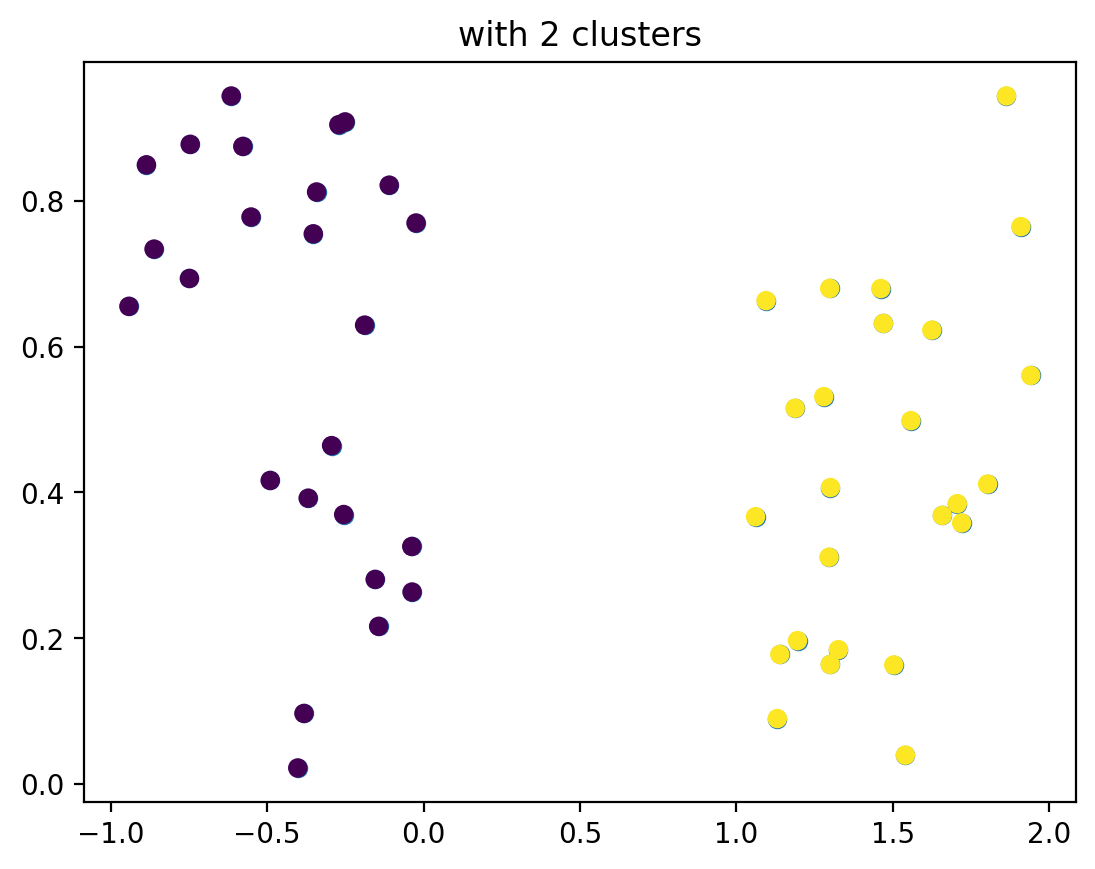

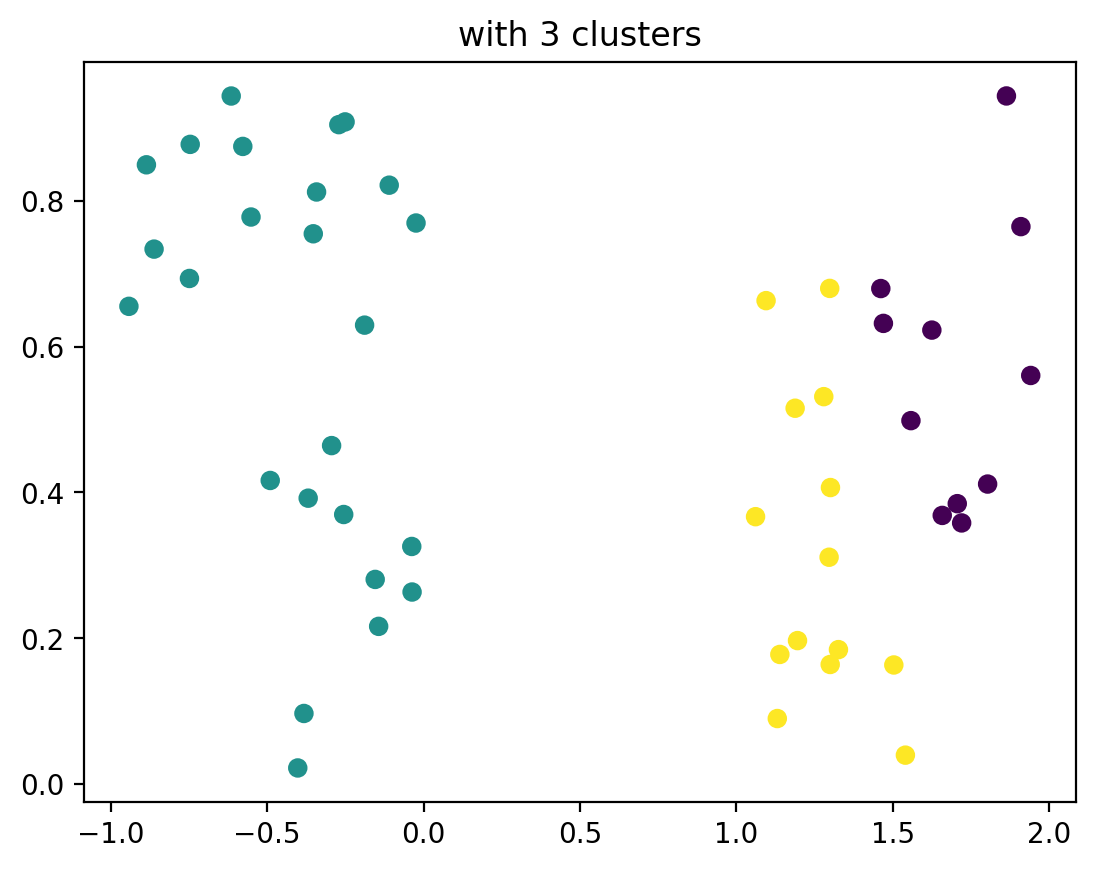

In [216]:
arr = np.random.rand(50, 2)

arr = [(x - 1 if idx < 25 else x + 1, y) for idx, (x, y) in enumerate(arr)]
x, y = list(map(list, zip(*arr)))

plt.scatter(x, y)

kmeans = cluster.KMeans(2).fit(arr)
plt.scatter(x, y, c=kmeans.labels_)
plt.title('with 2 clusters')
plt.show()

kmeans = cluster.KMeans(3).fit(arr)
plt.scatter(x, y, c=kmeans.labels_)
plt.title('with 3 clusters')
plt.show()